In [243]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [244]:
from glob import glob

In [245]:
#size of image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [302]:
MYDIR = './Cropped/'

In [303]:
folder_paths = []
for entry_name in os.listdir(MYDIR):
    entry_path = os.path.join(MYDIR, entry_name)
    if os.path.isdir(entry_path):
        folder_paths.append(entry_path)

In [304]:
folder_paths

['./Cropped/Anna Grodzka',
 './Cropped/Janusz Korwin-Mikke',
 './Cropped/Donald Tusk',
 './Cropped/Rafal Trzaskowski',
 './Cropped/Krzysztof Bosak',
 './Cropped/Leszek Miller',
 './Cropped/Andrzej Duda',
 './Cropped/Ryszard Kalisz',
 './Cropped/Beata Szydlo',
 './Cropped/Szymon Holownia',
 './Cropped/Bronislaw Komorowski',
 './Cropped/Robert Biedron',
 './Cropped/Jaroslaw Kaczynski']

In [305]:
from PIL import Image
import glob
image_list = []
for i in folder_paths:
    for filename in glob.glob(i+'/*.jpg'): #assuming gif
        image_list.append(filename)

In [306]:
image_list

['./Cropped/Anna Grodzka/flip_ab648e3ed7.jpg',
 './Cropped/Anna Grodzka/7f1007f716.jpg',
 './Cropped/Anna Grodzka/flip_312de5aaed.jpg',
 './Cropped/Anna Grodzka/16dd6df59c.jpg',
 './Cropped/Anna Grodzka/flip_193e81e2c2.jpg',
 './Cropped/Anna Grodzka/f8a718b2ff.jpg',
 './Cropped/Anna Grodzka/9dc4ffe615.jpg',
 './Cropped/Anna Grodzka/flip_46a4eefa50.jpg',
 './Cropped/Anna Grodzka/6e646bc3d4.jpg',
 './Cropped/Anna Grodzka/flip_2f8d879327.jpg',
 './Cropped/Anna Grodzka/flip_61ee8f4159.jpg',
 './Cropped/Anna Grodzka/1528c15f62.jpg',
 './Cropped/Anna Grodzka/a431dfe7b3.jpg',
 './Cropped/Anna Grodzka/flip_e8f0431cc9.jpg',
 './Cropped/Anna Grodzka/flip_2676c49a18.jpg',
 './Cropped/Anna Grodzka/flip_607a0556ef.jpg',
 './Cropped/Anna Grodzka/flip_e301ccdd27.jpg',
 './Cropped/Anna Grodzka/flip_9f8365d230.jpg',
 './Cropped/Anna Grodzka/01e199f374.jpg',
 './Cropped/Anna Grodzka/flip_5261479a65.jpg',
 './Cropped/Anna Grodzka/8584ff7fa8.jpg',
 './Cropped/Anna Grodzka/flip_9586487398.jpg',
 './Cropped

In [307]:
df = pd.DataFrame(data=image_list, columns=['path'])
df

,path
0,./Cropped/Anna Grodzka/flip_ab648e3ed7.jpg
1,./Cropped/Anna Grodzka/7f1007f716.jpg
2,./Cropped/Anna Grodzka/flip_312de5aaed.jpg
3,./Cropped/Anna Grodzka/16dd6df59c.jpg
4,./Cropped/Anna Grodzka/flip_193e81e2c2.jpg
...,...
3428,./Cropped/Jaroslaw Kaczynski/80329e395f.jpg
3429,./Cropped/Jaroslaw Kaczynski/57382cc510.jpg
3430,./Cropped/Jaroslaw Kaczynski/97853d58d3.jpg
3431,./Cropped/Jaroslaw Kaczynski/flip_380a5cea82.jpg


In [333]:
df['size'] = df['path'].apply(getSize)

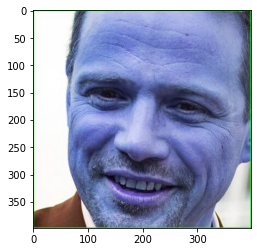

In [334]:
img = cv2.imread(df.iloc[1000][0])
plt.imshow(img)

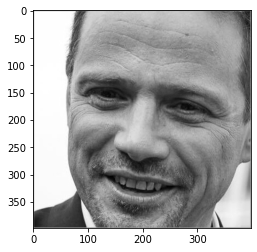

In [310]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [335]:
#size of image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [336]:
df['size'] = df['path'].apply(getSize)
df

,path,size,imie
0,./Cropped/Anna Grodzka/flip_ab648e3ed7.jpg,74,Grodzka
1,./Cropped/Anna Grodzka/7f1007f716.jpg,178,Grodzka
2,./Cropped/Anna Grodzka/flip_312de5aaed.jpg,66,Grodzka
3,./Cropped/Anna Grodzka/16dd6df59c.jpg,65,Grodzka
4,./Cropped/Anna Grodzka/flip_193e81e2c2.jpg,111,Grodzka
...,...,...,...
3428,./Cropped/Jaroslaw Kaczynski/80329e395f.jpg,60,Kaczynski
3429,./Cropped/Jaroslaw Kaczynski/57382cc510.jpg,143,Kaczynski
3430,./Cropped/Jaroslaw Kaczynski/97853d58d3.jpg,154,Kaczynski
3431,./Cropped/Jaroslaw Kaczynski/flip_380a5cea82.jpg,198,Kaczynski


In [313]:
df.describe()

,size
count,3433.000000
mean,194.438683
std,180.116645
min,39.000000
25%,80.000000
50%,129.000000
75%,245.000000
max,1438.000000


<AxesSubplot:>

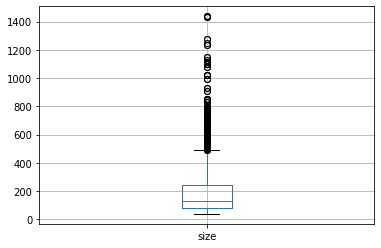

In [337]:
boxplot = df.boxplot(column=['size'])
boxplot

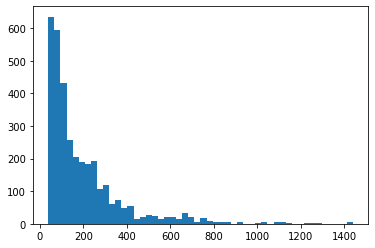

In [338]:
plt.hist(df['size'], bins=50)
plt.show()

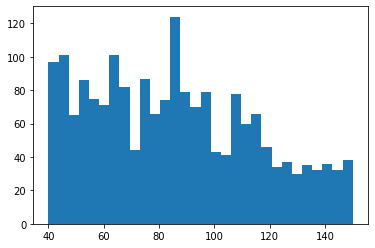

In [316]:
plt.hist(df['size'], bins=30, range=[40,150])
plt.show()

In [339]:
def name(string):
    try:
        return string.split('/')[2].split(" ")[1] 
    except:
        return None

In [340]:
df['imie'] = df['path'].apply(name)
df

,path,size,imie
0,./Cropped/Anna Grodzka/flip_ab648e3ed7.jpg,74,Grodzka
1,./Cropped/Anna Grodzka/7f1007f716.jpg,178,Grodzka
2,./Cropped/Anna Grodzka/flip_312de5aaed.jpg,66,Grodzka
3,./Cropped/Anna Grodzka/16dd6df59c.jpg,65,Grodzka
4,./Cropped/Anna Grodzka/flip_193e81e2c2.jpg,111,Grodzka
...,...,...,...
3428,./Cropped/Jaroslaw Kaczynski/80329e395f.jpg,60,Kaczynski
3429,./Cropped/Jaroslaw Kaczynski/57382cc510.jpg,143,Kaczynski
3430,./Cropped/Jaroslaw Kaczynski/97853d58d3.jpg,154,Kaczynski
3431,./Cropped/Jaroslaw Kaczynski/flip_380a5cea82.jpg,198,Kaczynski


In [341]:
df_new = df[df['size'] >= 80]
df_new

,path,size,imie
1,./Cropped/Anna Grodzka/7f1007f716.jpg,178,Grodzka
4,./Cropped/Anna Grodzka/flip_193e81e2c2.jpg,111,Grodzka
5,./Cropped/Anna Grodzka/f8a718b2ff.jpg,260,Grodzka
6,./Cropped/Anna Grodzka/9dc4ffe615.jpg,138,Grodzka
7,./Cropped/Anna Grodzka/flip_46a4eefa50.jpg,165,Grodzka
...,...,...,...
3427,./Cropped/Jaroslaw Kaczynski/flip_3eccad8bad.jpg,111,Kaczynski
3429,./Cropped/Jaroslaw Kaczynski/57382cc510.jpg,143,Kaczynski
3430,./Cropped/Jaroslaw Kaczynski/97853d58d3.jpg,154,Kaczynski
3431,./Cropped/Jaroslaw Kaczynski/flip_380a5cea82.jpg,198,Kaczynski


In [343]:
df_new['imie'].value_counts()

Trzaskowski     248
Kaczynski       246
Tusk            242
Duda            238
Szydlo          238
Holownia        207
Bosak           204
Komorowski      188
Korwin-Mikke    180
Biedron         179
Kalisz          157
Miller          135
Grodzka         124
Name: imie, dtype: int64

In [344]:
df_new['size'].min()

80

In [345]:
#resizing images
def resize_img(path_to_resize):
    try:
        img = cv2.imread(path_to_resize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        size = gray.shape[0]

        if size >= 120:
            gray_resize = cv2.resize(gray,(120,120),cv2.INTER_AREA)  #SHRINK
        else: 
            gray_resize = cv2.resize(gray,(120,120),cv2.INTER_CUBIC) #ENLARGE
    
        return gray_resize.flatten()
    except:
        return None

In [346]:
df_new['imie'] = df_new['path'].apply(name)

/Users/mypc/Desktop/Studia/Magisterka/Uczenie_Maszynowe/faceai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [347]:
df_new['structured'] = df_new['path'].apply(resize_img)

/Users/mypc/Desktop/Studia/Magisterka/Uczenie_Maszynowe/faceai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [348]:
df1 = df_new['structured'].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
1,149,150,149,150,149,150,149,150,150,150,...,128,128,125,125,125,122,125,128,126,148
4,150,151,148,147,147,145,146,148,147,145,...,149,153,155,152,152,153,152,148,155,155
5,151,150,151,150,151,150,149,150,149,151,...,94,91,87,88,88,88,90,89,93,120
6,150,150,149,150,150,150,150,150,150,150,...,147,152,145,153,147,146,148,148,149,150
7,149,148,147,154,149,153,147,146,156,151,...,132,135,139,139,138,133,135,122,148,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,150,150,162,154,150,147,151,154,150,154,...,154,158,160,155,152,151,141,139,149,155
3429,150,149,149,150,150,150,150,150,150,149,...,154,155,150,148,154,145,149,149,155,151
3430,150,150,150,150,150,150,149,151,149,149,...,150,147,145,140,139,139,134,137,138,151
3431,149,152,148,150,147,150,149,151,152,151,...,152,151,147,147,145,143,141,138,130,149


In [350]:
df2 = pd.concat((df_new['imie'],df1), axis=1)
df2

,imie,0,1,2,3,4,5,6,7,8,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
1,Grodzka,149,150,149,150,149,150,149,150,150,...,128,128,125,125,125,122,125,128,126,148
4,Grodzka,150,151,148,147,147,145,146,148,147,...,149,153,155,152,152,153,152,148,155,155
5,Grodzka,151,150,151,150,151,150,149,150,149,...,94,91,87,88,88,88,90,89,93,120
6,Grodzka,150,150,149,150,150,150,150,150,150,...,147,152,145,153,147,146,148,148,149,150
7,Grodzka,149,148,147,154,149,153,147,146,156,...,132,135,139,139,138,133,135,122,148,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,Kaczynski,150,150,162,154,150,147,151,154,150,...,154,158,160,155,152,151,141,139,149,155
3429,Kaczynski,150,149,149,150,150,150,150,150,150,...,154,155,150,148,154,145,149,149,155,151
3430,Kaczynski,150,150,150,150,150,150,149,151,149,...,150,147,145,140,139,139,134,137,138,151
3431,Kaczynski,149,152,148,150,147,150,149,151,152,...,152,151,147,147,145,143,141,138,130,149


In [385]:
df2[:1].iloc[:, 1:14401]

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
1,149,150,149,150,149,150,149,150,150,150,...,128,128,125,125,125,122,125,128,126,148


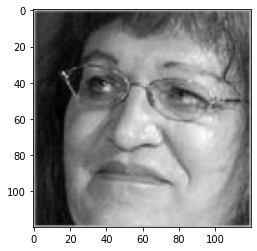

In [387]:
plt.imshow(df2[:1].iloc[:, 1:14401].values.reshape(120,120).astype('int'), cmap='gray')

In [330]:
df.loc[0][0]

'./Cropped/Anna Grodzka/flip_ab648e3ed7.jpg'

In [110]:
import pickle

In [353]:
pickle.dump(df2,open('./data/df_clean_all_images_120_120.pickle','wb'))